In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
# Set svg format
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

SUMMARY: SVM works better than KNN

In [149]:
wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [150]:
print(wine.feature_names)
print(wine.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [151]:
features_df = pd.DataFrame(data = wine.data, columns = wine.feature_names)
target_df = pd.DataFrame(data = wine.target, columns = ['class'])
df = features_df.merge(target_df, left_index = True, right_index = True)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<AxesSubplot:>

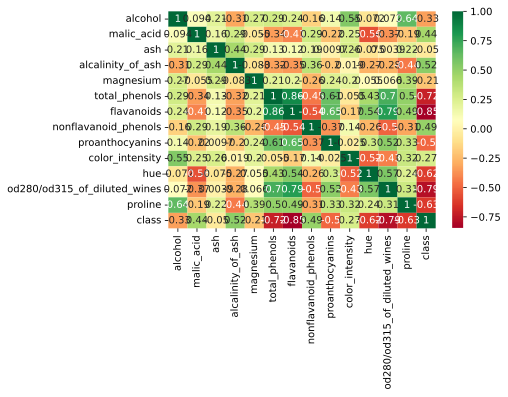

In [152]:
sns.heatmap(data = df.corr(), annot = True, cmap = 'RdYlGn')

In [153]:
selected_features = df[['malic_acid', 'ash', 'alcalinity_of_ash', 'nonflavanoid_phenols', 'color_intensity']]

In [154]:
# x = np.array(selected_features)
x = np.array(df.drop(labels = ['class'], axis = 1))
y = wine.target
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)

In [155]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.75


In [156]:
predict = model.predict(x_test)
p1 = max(max(y_test), max(predict))
p2 = min(min(y_test), min(predict))

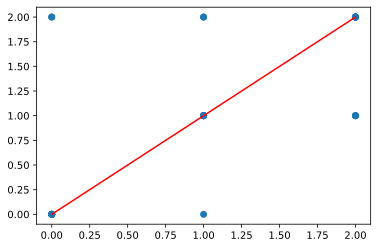

In [157]:
plt.scatter(y_test, predict)
plt.plot([p1, p2], [p1, p2], color = 'red')
plt.show()

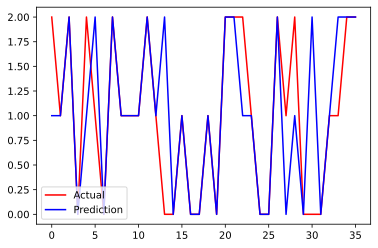

In [158]:
x_c = np.arange(len(predict))
plt.plot(x_c, y_test, label = 'Actual', color = 'red')
plt.plot(x_c, predict, label = 'Prediction', color = 'blue')
plt.legend()
plt.show()

In [159]:
clf = SVC(kernel = 'linear', C = 2)
clf.fit(x_train, y_train)
predict2 = clf.predict(x_test)
acc = metrics.accuracy_score(y_test, predict2)
print('Accuracy :', acc)

Accuracy : 0.9722222222222222


In [160]:
m1 = max(max(y_test), max(predict2))
m2 = min(min(y_test), min(predict2))

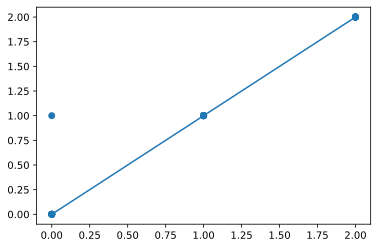

In [161]:
plt.scatter(y_test, predict2)
plt.plot([m1, m2], [m1, m2])
plt.show()

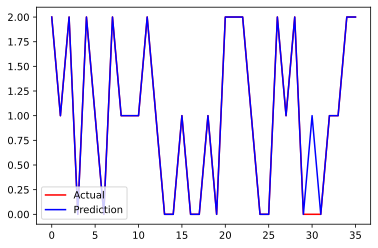

In [162]:
x__c = np.arange(len(predict2))
plt.plot(x__c, y_test, label = 'Actual', color = 'red')
plt.plot(x__c, predict2, label = 'Prediction', color = 'blue')
plt.legend()
plt.show()